# TMDb movie data
------------------------------------------------

# Questions :-
### 1- Which year has the highest release of movies?
### 2- Which Movie Has The Highest Or Lowest Profit? 
### 3- Top 10 movies which earn highest ?
### 4- Which 10 movies lost money ?
### 5- Movie with shorest and longest runtime?
### 6- Which Year Has The Highest Profit Rate?
### 7- Top 20 Director Who Directs Maximum Movies?


In [2]:
# import libraries for data
import pandas as pd
import numpy  as np

In [3]:
# import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# import the data
df = pd.read_csv('/home/ahmedfouad/nanodegree-first-project/tmdb-movies.csv')

In [5]:
# read the data
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [6]:
# read last 2 rows in our data
df.tail(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [7]:
#  the concise summery of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
#show summery of the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [9]:
# show correlations bettwen coluumns in our data
df.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014350,-0.141351,-0.099227,-0.088360,-0.035551,-0.058363,0.511364,-0.189015,-0.138477
popularity,-0.014350,1.000000,0.545472,0.663358,0.139033,0.800828,0.209511,0.089801,0.513550,0.609083
budget,-0.141351,0.545472,1.000000,0.734901,0.191283,0.632702,0.081014,0.115931,0.968963,0.622505
revenue,-0.099227,0.663358,0.734901,1.000000,0.162838,0.791175,0.172564,0.057048,0.706427,0.919110
runtime,-0.088360,0.139033,0.191283,0.162838,1.000000,0.163278,0.156835,-0.117204,0.221114,0.175676
vote_count,-0.035551,0.800828,0.632702,0.791175,0.163278,1.000000,0.253823,0.107948,0.587051,0.707942
vote_average,-0.058363,0.209511,0.081014,0.172564,0.156835,0.253823,1.000000,-0.117632,0.093039,0.193085
release_year,0.511364,0.089801,0.115931,0.057048,-0.117204,0.107948,-0.117632,1.000000,0.016793,-0.066256
budget_adj,-0.189015,0.513550,0.968963,0.706427,0.221114,0.587051,0.093039,0.016793,1.000000,0.646607
revenue_adj,-0.138477,0.609083,0.622505,0.919110,0.175676,0.707942,0.193085,-0.066256,0.646607,1.000000


<AxesSubplot:>

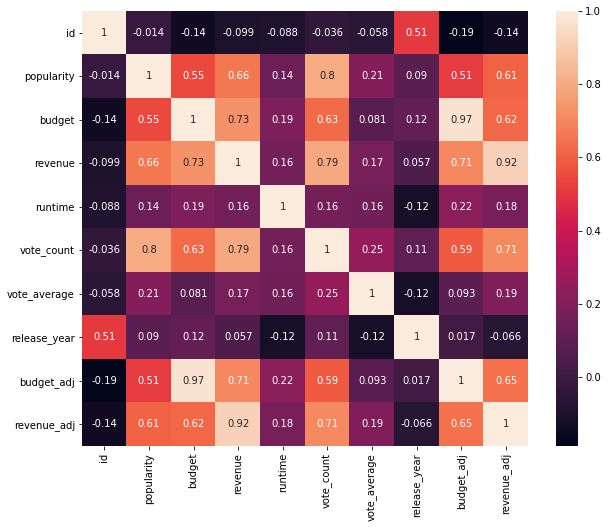

In [10]:
# plot this correlation to be more visualization
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [11]:
#  contain null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [12]:
# fill the null values with zero using 'fillna' function
df.fillna(0)
print('--')

--


In [12]:
# Are there any duplicate rows ?
df.duplicated().sum()

1

# Data Cleaning :-
### 1- We need to remove duplicate rows from the dataset
### 2- Changing format of release date into datetime format
### 3- Remove the unused colums that are not needes in the analysis process.

In [13]:
# Remove Duplicate Rows again  
df.drop_duplicates(inplace=True)
print('-----')

-----


In [14]:
# Are there any duplicate rows again ?
df.duplicated().sum()

0

In [16]:
# Changing Format Of Release Date Into Datetime Format
df['release_date'] = pd.to_datetime(df['release_date'])

In [17]:
# make sure format of release date
df['release_date']

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10861   2066-06-15
10862   2066-12-21
10863   2066-01-01
10864   2066-11-02
10865   2066-11-15
Name: release_date, Length: 10865, dtype: datetime64[ns]

In [18]:
# Remove the unused colums that are not needes in the analysis process
df.drop(['budget_adj','revenue_adj','overview','imdb_id','homepage','tagline'] ,axis=1 ,inplace=True)

# Q1 : Which year has the highest release of movies?


In [19]:
# use value_counts() function to get the count of release of movies each year
df['release_year'].value_counts().head(1)

2014    700
Name: release_year, dtype: int64

Text(0, 0.5, 'Number Of Movies')

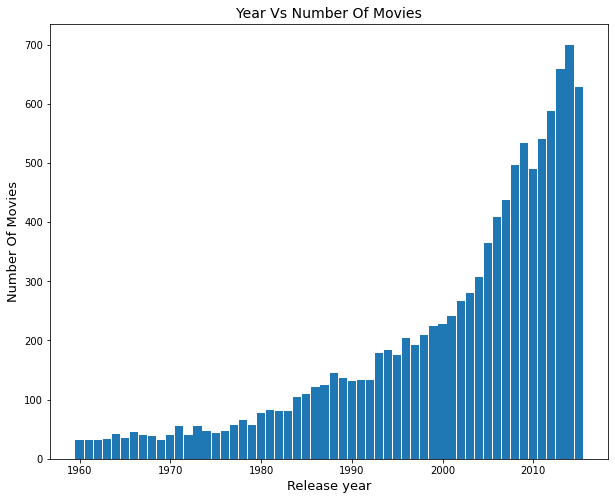

In [20]:
#  store release_year in x
x = df.groupby('release_year').count().index
#  store count of release_year in hight
hight = df.groupby('release_year').count()['id']

# size of ploting
plt.figure(figsize=(10,8))

# to plot x , hight
plt.bar(x , hight, width =.9)

# to add title , name of x label and y label
plt.title("Year Vs Number Of Movies",fontsize = 14)
plt.xlabel('Release year',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 13)

###  as we  can see the year has the highest release of movies is 2015
---------------

# Q2: Which Movie Has The Highest Or Lowest Profit?

In [22]:
# Creat New Colum named 'Profit' = revenue - budget
df['Profit'] = df['revenue'] - df['budget']

In [23]:
# The Highest Profit :
df[ df['Profit'] ==df['Profit'].max()]['original_title']

1386    Avatar
Name: original_title, dtype: object

In [24]:
# The Lowest Profit :
df[ df['Profit'] == df['Profit'].min()]['original_title']

2244    The Warrior's Way
Name: original_title, dtype: object

# Q3: Top 10 movies which earn highest ?

In [25]:
# use sort_values() function to sort data descending by 'Profit'  
df.sort_values(by='Profit', ascending=False,)['original_title'].head(10)

1386                                          Avatar
3                       Star Wars: The Force Awakens
5231                                         Titanic
0                                     Jurassic World
4                                          Furious 7
4361                                    The Avengers
3374    Harry Potter and the Deathly Hallows: Part 2
14                           Avengers: Age of Ultron
5422                                          Frozen
8094                                         The Net
Name: original_title, dtype: object

Text(0.5, 1.0, 'Top 10 High Profit Movies')

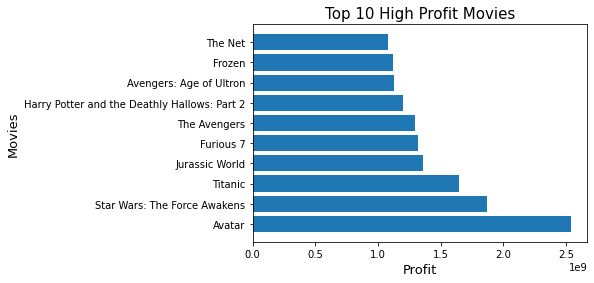

In [29]:
# top 10 movies which made highest Profit.
# sort the 'Profit' column in decending order and store it in the new dataframe.

info = pd.DataFrame(df['Profit'].sort_values(ascending = False))
info['original_title'] = df['original_title']

x = list(info['original_title'][:10])
y = list(info['Profit'][:10])

# ploting data
plt.barh(x,y)

# to add title , name of x label and y label
plt.xlabel('Profit',fontsize = 13)
plt.ylabel('Movies',fontsize = 13)
plt.title('Top 10 High Profit Movies',fontsize = 15)

### as we can see the Top movie profit is 'Avatar'
---------------------

# Q4:  Which 10 movies lost money ?

Text(0.5, 1.0, '10 movies lost money')

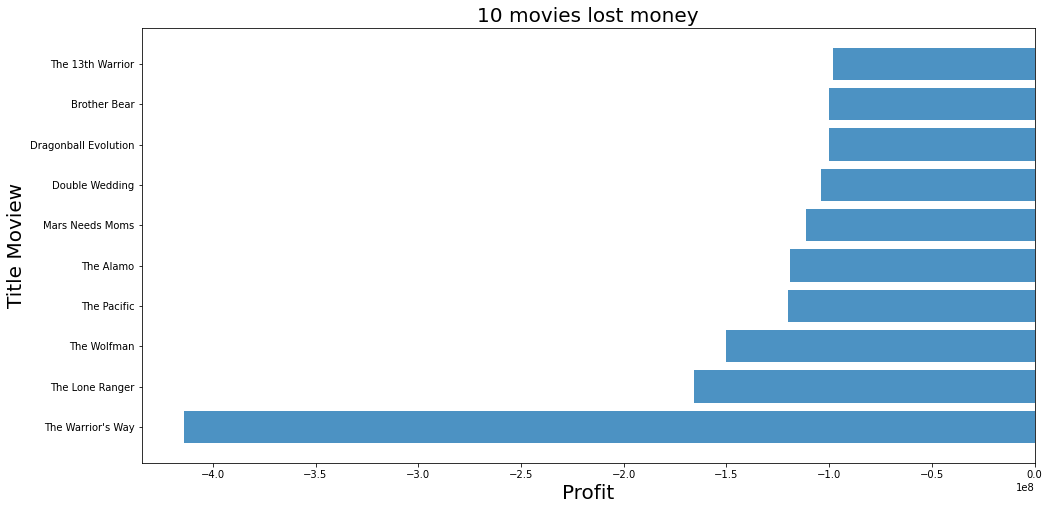

In [31]:
# 10 movies which made lostest Profit.
# sort the 'Profit' column in descending order and store it in the new dataframe.

info2 = pd.DataFrame(df['Profit'].sort_values())
info2['original_title'] = df['original_title']

# size of ploting
plt.figure(figsize=(16,8))

x = info2['original_title'][:10]
hight = info2['Profit'][:10] 

# ploting data
plt.barh(x ,hight ,alpha=.8)

# to add title , name of x label and y label
plt.xlabel("Profit", fontsize=20)
plt.ylabel("Title Moview", fontsize=20)
plt.title('10 movies lost money', fontsize=20)

### as we can see the most movie losted money  is 'The Warrior's Way'
------------------------------

# Q5 : Movie with shorest and longest runtime?

In [30]:
# Movie with shorest runtime :

df[ df['runtime'] == df['runtime'].min()]['original_title'].head()

92          Mythica: The Necromancer
334                          Ronaldo
410                   Anarchy Parlor
445    The Exorcism of Molly Hartley
486               If There Be Thorns
Name: original_title, dtype: object

Text(0.5, 1.0, 'Runtime Vs Movies')

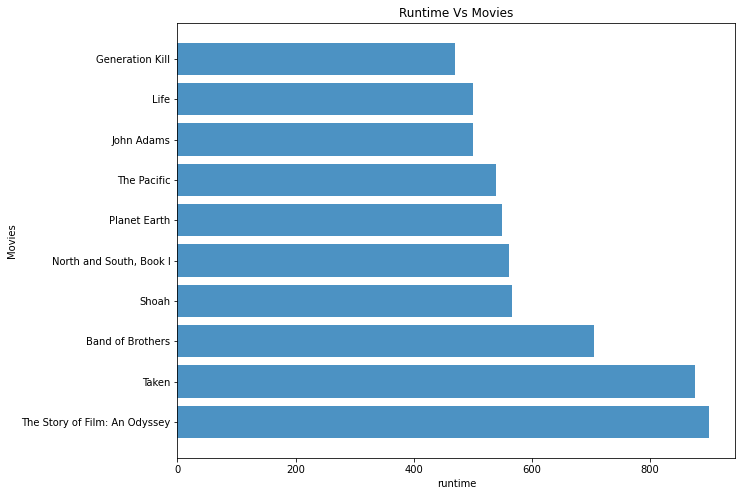

In [32]:
# Movie with longest runtime :

longMov = df.sort_values(by='runtime',ascending=False)[['runtime','original_title']][:10]

x = longMov['original_title']
hight = longMov['runtime']

# size of ploting
plt.figure(figsize=(10,8))

# ploting data
plt.barh(x,hight ,alpha=.8)

# to add title , name of x label and y label
plt.xlabel('runtime')
plt.ylabel('Movies')
plt.title('Runtime Vs Movies')

### as we can see the movie with longest runtime is 'The Story of Film:An Odyssey'
------------------------

# Q6: Which Year Has The Highest Profit Rate?

Text(0.5, 1.0, 'Years Vs Total Profits')

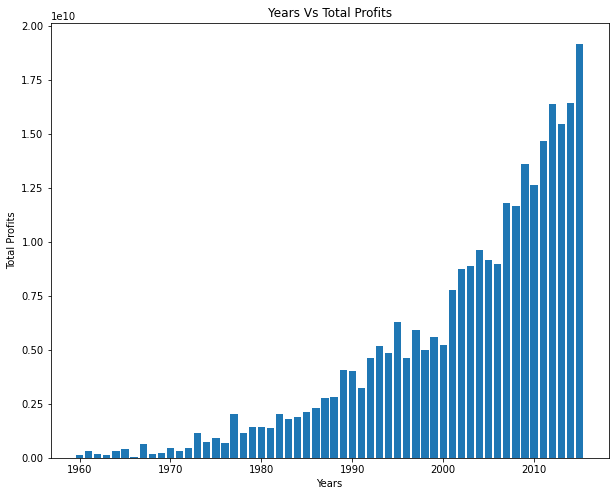

In [34]:
# creat two lists aumpty
Pro_On_Year = []
years = []

# this for loob going to calculate the sum of profit in each year 
# and store this values in 'Pro_On_Year' and store the years in 'years'
for i in df['release_year'].unique():
    ProfinY = sum(list(df[ df['release_year']==i ]['Profit']))
    Pro_On_Year.append(ProfinY)
    years.append(i)
    
# and creat new dataframe to save this values in it
new_df = pd.DataFrame(years ,columns=['Year'] )
new_df['TotalProfits'] = Pro_On_Year
new_df = new_df.sort_values(by='TotalProfits',ascending=False)


x = new_df['Year']
hight = new_df['TotalProfits']

# size of ploting
plt.figure(figsize=(10,8))

# ploting data
plt.bar(x,hight)

# to add title , name of x label and y label
plt.xlabel('Years')
plt.ylabel('Total Profits')
plt.title('Years Vs Total Profits')

### as we can see the year has the highest profit rate is 2015
------------------

# Q7: Top 20 Director Who Directs Maximum Movies?

Text(0, 0.5, 'Director')

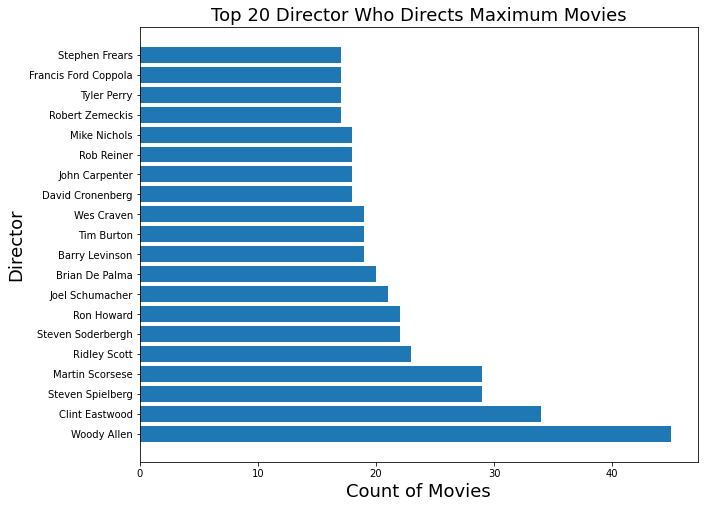

In [35]:
# select Top 20 director 
x =  df['director'].value_counts()[:20].keys()
hight = list(df['director'].value_counts()[:20])

# size of ploting
plt.figure(figsize=(10,8))

# ploting data
plt.barh(x ,hight)

# to add title , name of x label and y label
plt.title('Top 20 Director Who Directs Maximum Movies',fontsize=18)
plt.xlabel('Count of Movies',fontsize=18)
plt.ylabel('Director',fontsize=18)

### as we can see the top Director is 'Woody Allen'
----------------------

# Conclusions Phase

-------------------------------------------------------------------------------------
### in this phase we will conclusions the report :
* the movies that reached the top 10 earnings-wise is because they were all about Action and Science Fiction which means that people like that category of movies
Movies with higher revenues are consistently more profitable.

* Revenue and budget have a weakly positive correlation.

* Movies with higher revenues make more profits.

* Revenue and profitability have a weak positive correlation.

* Movies with higher revenues are more popular.
* Runtime lengths have decreased by 16% from 1960 to 2015.